#### `Hetal Khanapure`
 - M.No : +91-9948251997
 - Email ID : hetu.parmar@gmail.com

## US bike-sharing Multiple Regression Model - Case Study

#### Problem Statement : 
  - A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. 
  - so the company wants to know ,
      - how exactly the demands vary with different features.Further, the model will be a good way for management to understand the demand dynamics of a new market. 
      - Which variables are significant in predicting the demand for shared bikes.
      - How well those variables describe the bike demands

#### Provided Dataset 

Datasets:

1. day.csv : bike sharing dataset

    Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 
    
2. Data Dictionary file

3. `cnt` is target variable

## Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import libraries
import numpy as np
import pandas as pd

#visulization libraries
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm  
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [3]:
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 500) 
pd.set_option('display.width', 1000)

In [4]:
# reading data
bikesharing = pd.read_csv("day.csv")

In [5]:
# check first few rows of dataset

bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### Inspect the various aspects of the bikesharing dataframe

In [6]:
# checking shape of the dataframe
bikesharing.shape

(730, 16)

bikesharing dataframe have 730 rows and 16 columns.

In [7]:
#checking info of the dataframe
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- there is no null data
- data contains  11 int, 4 float and 1 string type data

In [8]:
# check the basic statastics of the dataframe
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Data cleaning

- we dont need `dteday` column because we have already extracted year and month within dataframe 
  so we ll drop dteday 
- we have `cnt` = `casual` + `registered` so we dont need casual and registered columns so we ll drop that as well
- instant column is just row index so we ll drop that as well
- we have two columns for temperature `temp` and `atemp` so we ll check corellation

In [9]:
# checking correlation between temp and atemp columns

bikesharing['temp'].corr(bikesharing['atemp'])

0.9916961786905648

`temp` and `atemp` are highly correlated with correlation value of 0.99
- Defination as per dictionary:
  - `temp` : temperature in Celsius
  - `atemp`: feeling temperature in Celsius
we can drop `atemp`


In [10]:
# droping the columns which are not required

bikesharing=bikesharing.drop(['dteday','casual','registered','instant','atemp'],axis=1)


In [11]:
# checking the dataframe again
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


As per the Data Dictionary provided Below is the defination of `yr` :
- `yr` : year (0: 2018, 1: 2019)

In [12]:
# map year columns to its respective year value
bikesharing['yr'] = bikesharing['yr'].map({0: 2018, 1:2019})

We will convert `weathersit`,`season` to string for better visulization
- `season` : season (1:spring, 2:summer, 3:fall, 4:winter)
- `weathersit` : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [13]:
# convert season column to respective string value
bikesharing['season'] = bikesharing['season'].map({1: 'spring', 2:'summer',3:'fall',4:'winter'})

In [14]:
# convert weathersit column to respective string value
bikesharing['weathersit'] = bikesharing['weathersit'].map({1: 'Clear', 2:'Mist',3:'LighRain',4:'HeavyRain'})

In [15]:
# convert mnth column to respective string value
bikesharing['mnth'] = bikesharing['mnth'].map({1: 'Jan', 2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',
                                               10:'Oct',11:'Nov',12:'Dec'
                                              })

In [16]:
# convert weekday column to respective string value
bikesharing['weekday'] = bikesharing['weekday'].map({1: 'Mon', 2:'Tue',3:'Wed',4:'Thur',5:'Fri',6:'Sat',7:'Sun' })

check the `hum` column 

In [17]:
#checking statastics of hum column
bikesharing.hum.describe()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64

min of `hum` is showing 0, humidity=0 is not practically possible thus we will impute this data with mean of the nearby data

In [18]:
# searching for data where humidity <=0 
bikesharing[bikesharing['hum']<=0]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
68,spring,2018,Mar,0,Sat,0,LighRain,15.952731,0.0,17.545759,623


In [19]:
# imput the humidity=0 data with mean of march month data 
march_data=bikesharing[bikesharing['mnth']=='Mar']
mean_val=march_data['hum'].mean()

In [20]:
# impute the data
bikesharing.loc[bikesharing['hum'] == 0.0, 'hum'] = mean_val

In [21]:
# check the hum=0 data is updated or not
bikesharing[bikesharing['hum']==0.0]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt


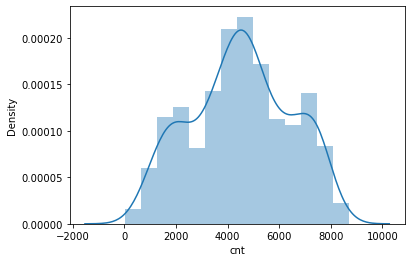

In [22]:
#checking the distribution of cnt variable
sns.distplot(bikesharing['cnt'])
plt.show()

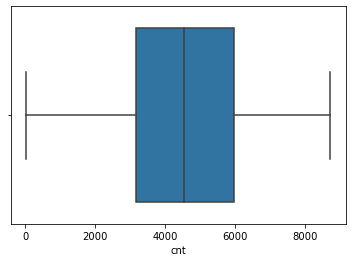

In [23]:
#Checking for outliers in target variable
sns.boxplot(bikesharing['cnt'])
plt.show()

There are no outlier in our target column

check `windspeed` column and `temp` column

In [24]:
#checking statastics of windspeed column
bikesharing.windspeed.describe()

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

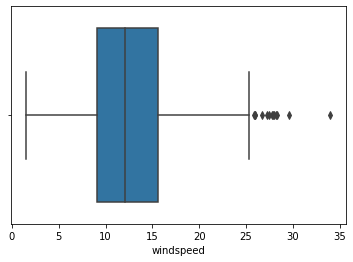

In [25]:
# checking outliers for Windspeed column
sns.boxplot(bikesharing['windspeed'])
plt.show()

We can see outliers in `windspeed` column

In [26]:
# get the mean of windspeed 
mean_windspeed=bikesharing['windspeed'].mean()
mean_windspeed

12.763619654657532

In [27]:
# impute outliers with mean of windspeed column
Q1 = bikesharing['windspeed'].quantile(0.25)
Q3 = bikesharing['windspeed'].quantile(0.75)
IQR = Q3 - Q1

bikesharing.windspeed.loc[(bikesharing['windspeed'] >(Q3 + 1.5 * IQR)) ]  = mean_windspeed

In [28]:
bikesharing['windspeed'].describe()

count    730.000000
mean      12.493822
std        4.770360
min        1.500244
25%        9.041650
50%       12.125325
75%       15.405896
max       25.333236
Name: windspeed, dtype: float64

`windspeed` values looks good so we ll not change anything

In [29]:
#checking statastics of temp column
bikesharing.temp.describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

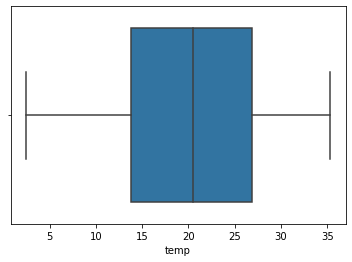

In [30]:
# checking outliers in temperature column
sns.boxplot(bikesharing['temp'])
plt.show()

`temp` values looks good so we ll not change anything

In [31]:
# checkinf first few row of the dataframe
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,0,Mon,1,Mist,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,0,Tue,1,Mist,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,0,Thur,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


## Step 3: Visualising the Data

#### Visualising Numeric Variables

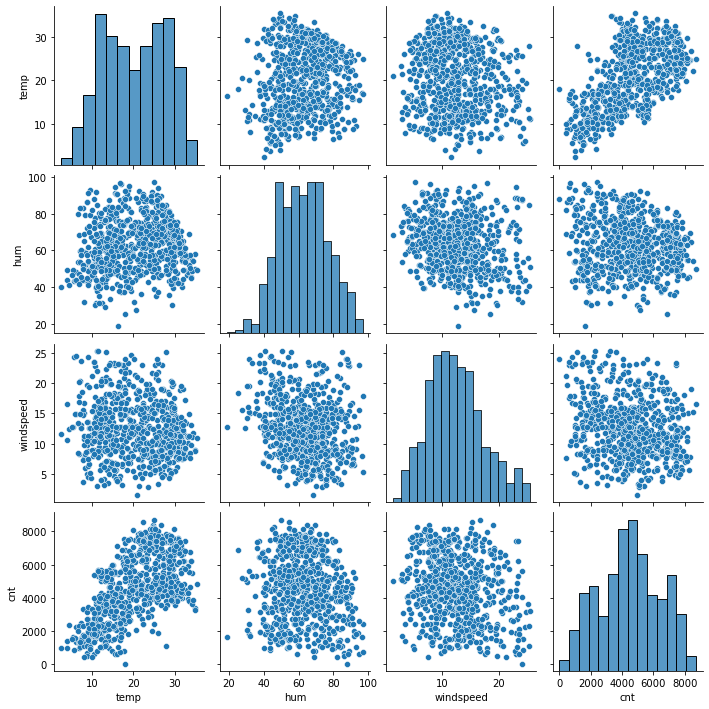

In [32]:
# Pair plot is good way to visulize all numeric data 
num_cols=['temp','hum','windspeed','cnt']
df_num=bikesharing[num_cols]
sns.pairplot(df_num)
plt.show()

From above pair plot we can see few pattern
   - 1) Strong linear relationship can be seen between count and temp
   - 2) humidity,windspeed also somewhat related with count

#### Visualising Categorical Variables

#####  holiday,working/nonworkingday,Year,month,weekday,season and weather situation with count

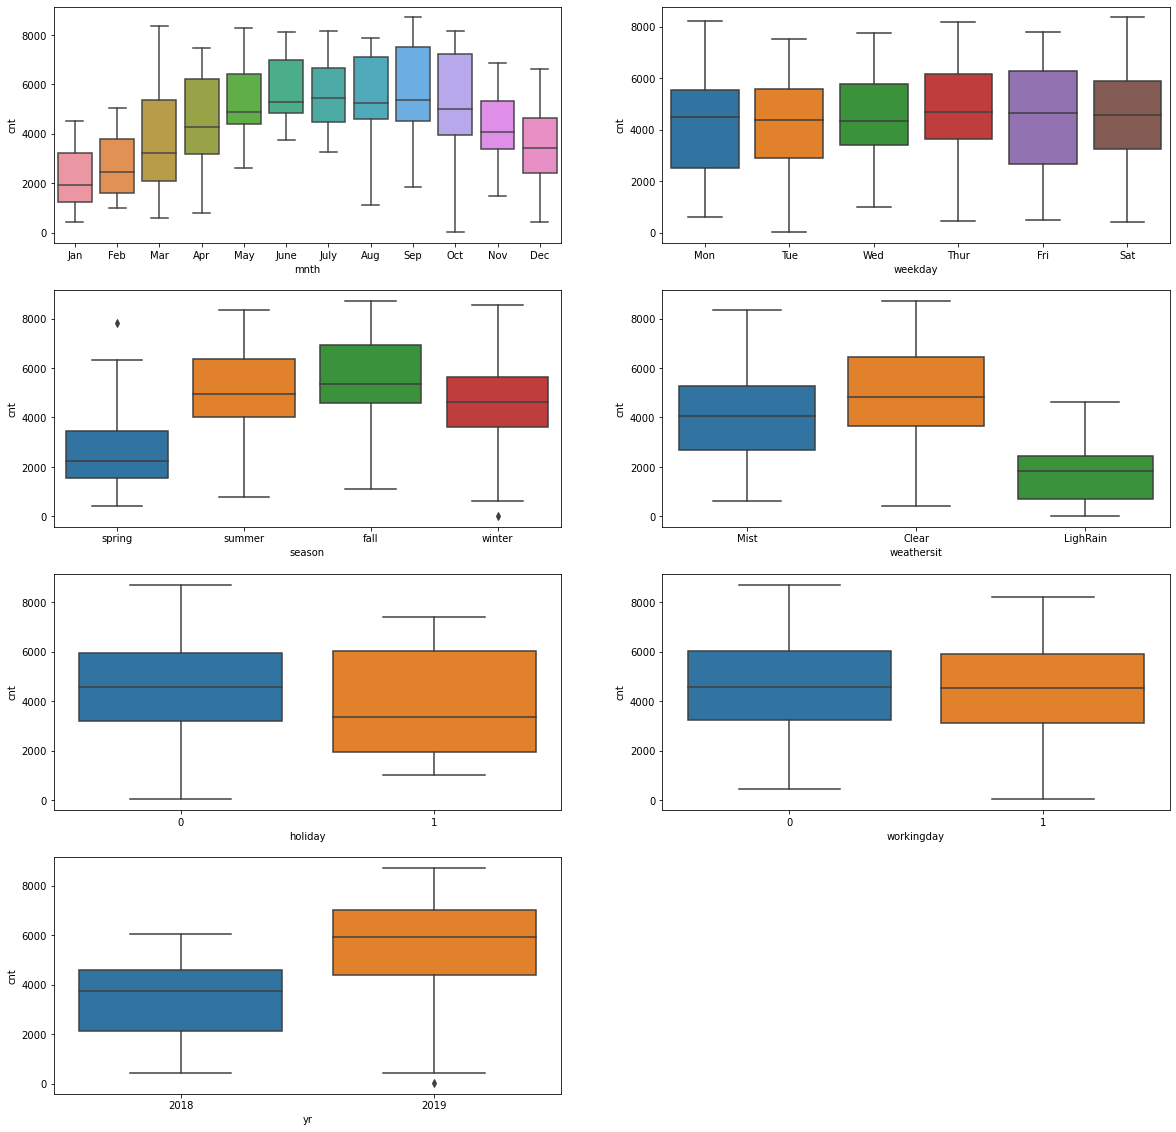

In [33]:
# boxplot for categorical variables
plt.figure(figsize=(20, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesharing)
plt.subplot(4,2,2)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharing)
plt.subplot(4,2,3)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharing)
plt.subplot(4,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharing)
plt.subplot(4,2,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesharing)
plt.subplot(4,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesharing)
plt.subplot(4,2,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bikesharing)
plt.show()

Few pattern we can see from above boxplots
- 1) counts are more in month sep,oct
- 2) all weekday shows almost similar values of count
- 3) Fall season have more count followed by summer,winter,spring
- 4) count is more when wheather is clear
- 5) count is more when its not holiday 
- 6) working day and non working day shows almost similar count.
- 7) year 2019 showing more count compare to 2018

## Step 4: Data transformation

#### Dummy variables

The following variables need to convert into integer , so we will create dummy variables for that.
- `season`
- `weathersit`
- `mnth`
- `weekday`


In [34]:
dummy_var_col=['season','weathersit','mnth','weekday']
dummy_var_df = pd.get_dummies(bikesharing[dummy_var_col],drop_first=True)


In [35]:
dummy_var_df.head()

,season_spring,season_summer,season_winter,weathersit_LighRain,weathersit_Mist,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Thur,weekday_Tue,weekday_Wed
0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


- Season : we have 4 level so dummy variables are 3
   - spring : 100
   - summer : 010
   - winter : 001
   - fall   : 000 (fall is considered as reference group)
- Weather situation we have 4 level but we dont have any data for 4th level(HeavyRain) so only 3 levels data we have , dummy varibles created 2 for that
    - light Rain : 10
    - mist       : 01
    - clear      : 00 (clear is considered as reference group)
- for month 11 dummy variables created
- for weekday we dont have any data for sunday so dummy variable created 5
    

In [36]:
# Add the dummy variables to the original bikesharing dataframe

bikesharing = pd.concat([bikesharing, dummy_var_df], axis = 1)

In [37]:
# check head of the dataframe

bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_LighRain,weathersit_Mist,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Thur,weekday_Tue,weekday_Wed
0,spring,2018,Jan,0,Mon,1,Mist,14.110847,80.5833,10.749882,985,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,spring,2018,Jan,0,Tue,1,Mist,14.902598,69.6087,16.652113,801,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,spring,2018,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,spring,2018,Jan,0,Thur,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,spring,2018,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
# Drop dummy_var_col as we have created the dummies for it

bikesharing.drop(dummy_var_col, axis = 1, inplace = True)

In [39]:
# check head of the dataframe

bikesharing.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_LighRain,weathersit_Mist,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Thur,weekday_Tue,weekday_Wed
0,2018,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,2018,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,2018,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,2018,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,2018,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
# convert year into binary
bikesharing[['yr']] = bikesharing[['yr']].apply(lambda x :x.map({2019: 1, 2018: 0}))

In [41]:
bikesharing.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_LighRain,weathersit_Mist,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Thur,weekday_Tue,weekday_Wed
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   hum                  730 non-null    float64
 5   windspeed            730 non-null    float64
 6   cnt                  730 non-null    int64  
 7   season_spring        730 non-null    uint8  
 8   season_summer        730 non-null    uint8  
 9   season_winter        730 non-null    uint8  
 10  weathersit_LighRain  730 non-null    uint8  
 11  weathersit_Mist      730 non-null    uint8  
 12  mnth_Aug             730 non-null    uint8  
 13  mnth_Dec             730 non-null    uint8  
 14  mnth_Feb             730 non-null    uint8  
 15  mnth_Jan             730 non-null    uin

## Step 5: Splitting the Data into Training and Test Data Sets

We will split data in to two parts :
   - Training Dataset : 70% of data
   - Test Dataset: 30% of data

In [43]:

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikesharing, train_size = 0.7, test_size = 0.3, random_state = 100)

## Step 6: Rescaling the Features

We will Rescale following variables for better model evaluation:
 - `temp` : temperature
 - `hum`   : humidity
 - `windspeed`: windspeed
 - `cnt`: count

In [44]:
#list down the variable to rescale
var_to_scale=['temp','hum','windspeed','cnt']

In [45]:
# using MinMaxScaler
scaler = MinMaxScaler()

In [46]:
# apply scaler function to selected variables
df_train[var_to_scale] = scaler.fit_transform(df_train[var_to_scale])

In [47]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_LighRain,weathersit_Mist,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Thur,weekday_Tue,weekday_Wed
653,1,0,1,0.509887,0.473375,0.416662,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.659744,0.366645,0.827658,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.553780,0.353703,0.465255,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
728,1,0,1,0.245101,0.377528,0.918542,0.204096,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
482,1,0,0,0.395666,0.385516,0.261077,0.482973,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_LighRain,weathersit_Mist,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Thur,weekday_Tue,weekday_Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.567880,0.429804,0.513620,0.243137,0.245098,0.24902,0.029412,0.343137,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,0.225844,0.177358,0.212564,0.224593,0.429398,0.430568,0.43287,0.169124,0.475223,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.428913,0.275905,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.570553,0.411079,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.695953,0.561104,0.684710,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


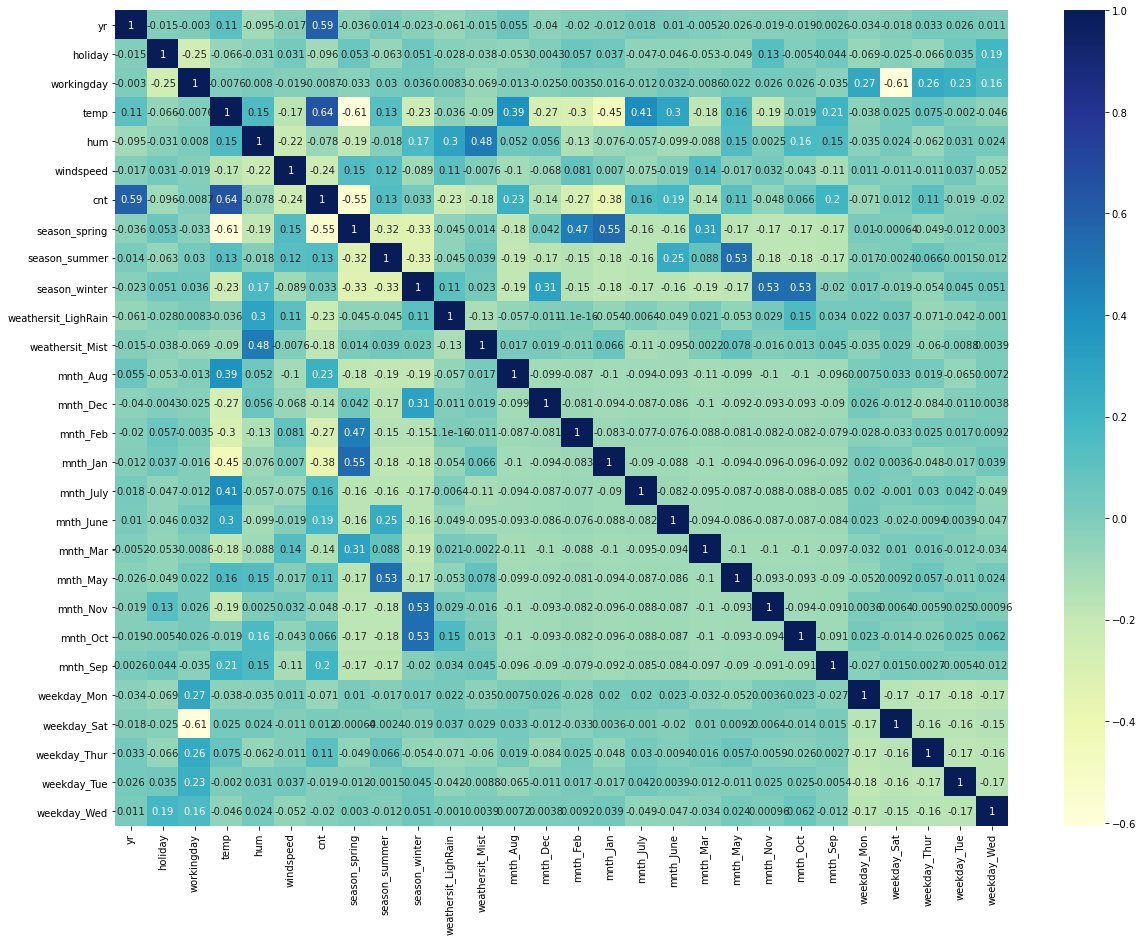

In [49]:
# check the correlation coefficients to see which variables are highly correlated.for that ploting heatmap

plt.figure(figsize = (20, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

- `temp` is correlated with `cnt` the most 
- `season_spring`,`month_Jan`,`windspeed` is negatively correlated with `cnt`


### Dividing into X and Y sets for the model building

In [50]:

y_train = df_train['cnt']
X_train = df_train.loc[ : , df_train.columns != 'cnt']


## Step 7: Building Model

The predictor variables are more so we will use RFE(Recursive Feature Elimination)
We will pass arbitory number of variable to select, in this case lets take 15.

In [51]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [52]:
# create datafrme of the variable with rfe rank
rfe_df = pd.DataFrame({'variables': X_train.columns, 'Support': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,variables,Support,Ranking
0,yr,True,1
21,mnth_Sep,True,1
19,mnth_Nov,True,1
15,mnth_July,True,1
14,mnth_Jan,True,1
12,mnth_Dec,True,1
10,weathersit_Mist,True,1
9,weathersit_LighRain,True,1
13,mnth_Feb,True,1
6,season_spring,True,1


In [53]:
# Rfe supported variable
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_winter', 'weathersit_LighRain', 'weathersit_Mist', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_Nov', 'mnth_Sep'], dtype='object')

### Building model using statsmodel, for the detailed statistics

In [54]:
# Function to calculate VIF(variance inflation factor to check multicolinearity between predictors)
def cal_vif(df):
    vif = pd.DataFrame()
    
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### 7.1 : Model Creation by RFE

###  Model 1

This model contain all 15 variables

In [55]:
X_train_M1 = X_train[col]
X_train_lm1 = sm.add_constant(X_train_M1)  # add constant
lm_1 = sm.OLS(y_train,X_train_lm1).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     171.3
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          1.26e-184
Time:                        22:28:45   Log-Likelihood:                 503.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     494   BIC:                            -907.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3311    

from above statastic summary P value of all variables are less than 0.05 so now we can check the VIF 

In [56]:
# call the VIF function which we already defined
cal_vif(X_train_M1)

,Features,VIF
3,hum,18.44
2,temp,14.12
4,windspeed,4.38
5,season_spring,4.00
6,season_winter,2.89
8,weathersit_Mist,2.44
11,mnth_Jan,2.29
0,yr,2.08
10,mnth_Feb,1.89
13,mnth_Nov,1.84


From above VIF we can see that `hum` variables is explained by some other feature so we will drop this column and rebuild the model.

### Model 2

lets drop `hum` as it have high VIF

In [57]:
X_train_M2 = X_train_M1.drop(["hum"], axis = 1)

Rebuilding the model without `hum`

In [58]:

X_train_lm2 = sm.add_constant(X_train_M2)  # add constant
lm_2 = sm.OLS(y_train,X_train_lm2).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     179.1
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          2.00e-183
Time:                        22:29:29   Log-Likelihood:                 498.21
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     495   BIC:                            -902.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2889    

In [59]:
#check the VIFs

cal_vif(X_train_M2)

,Features,VIF
2,temp,4.93
3,windspeed,4.38
4,season_spring,3.75
5,season_winter,2.57
10,mnth_Jan,2.20
0,yr,2.06
9,mnth_Feb,1.88
12,mnth_Nov,1.83
8,mnth_Dec,1.55
7,weathersit_Mist,1.54


### Model 3

from the summary, we can still see some of them have a high p-value. `mnth_Feb` for instance, has a p-value of 0.036. We should drop this variable as well.

In [60]:
# droping mnth_feb variable
X_train_M3 = X_train_M2.drop(["mnth_Feb"], axis = 1)

In [61]:
# rebuild the model
X_train_lm3 = sm.add_constant(X_train_M3)  # add constant
lm_3 = sm.OLS(y_train,X_train_lm3).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.2
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          1.28e-183
Time:                        22:30:06   Log-Likelihood:                 495.93
No. Observations:                 510   AIC:                            -963.9
Df Residuals:                     496   BIC:                            -904.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2768    

In [62]:
#check the VIFs

cal_vif(X_train_M3)

,Features,VIF
2,temp,4.90
3,windspeed,4.37
5,season_winter,2.53
4,season_spring,2.31
0,yr,2.06
11,mnth_Nov,1.81
9,mnth_Jan,1.65
7,weathersit_Mist,1.54
8,mnth_Dec,1.46
10,mnth_July,1.36


### Model 4

from the summary, we can still see some of them have a high p-value. `mnth_Nov` for instance, has a p-value of 0.016. We should drop this variable as well.

In [63]:
# droping mnth_feb variable
X_train_M4 = X_train_M3.drop(["mnth_Nov"], axis = 1)

In [64]:
# rebuild the model
X_train_lm4 = sm.add_constant(X_train_M4)  # add constant
lm_4 = sm.OLS(y_train,X_train_lm4).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     204.7
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          1.61e-183
Time:                        22:30:21   Log-Likelihood:                 492.93
No. Observations:                 510   AIC:                            -959.9
Df Residuals:                     497   BIC:                            -904.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2658    

In [65]:
#check the VIFs

cal_vif(X_train_M4)

,Features,VIF
2,temp,4.85
3,windspeed,4.30
4,season_spring,2.31
0,yr,2.06
5,season_winter,1.64
9,mnth_Jan,1.64
7,weathersit_Mist,1.54
10,mnth_July,1.36
8,mnth_Dec,1.29
11,mnth_Sep,1.20


### Model 5

from the summary, we can still see some of them have a high p-value. `mnth_Dec` for instance, has a p-value of 0.056. We should drop this variable as well.

In [66]:
# droping mnth_feb variable
X_train_M5 = X_train_M4.drop(["mnth_Dec"], axis = 1)

In [67]:
# rebuild the model
X_train_lm5 = sm.add_constant(X_train_M5)  # add constant
lm_5 = sm.OLS(y_train,X_train_lm5).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     221.8
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          6.46e-184
Time:                        22:30:39   Log-Likelihood:                 491.06
No. Observations:                 510   AIC:                            -958.1
Df Residuals:                     498   BIC:                            -907.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2553    

In [68]:
#check the VIFs

cal_vif(X_train_M5)

,Features,VIF
2,temp,4.84
3,windspeed,4.30
4,season_spring,2.20
0,yr,2.06
8,mnth_Jan,1.60
7,weathersit_Mist,1.54
5,season_winter,1.40
9,mnth_July,1.36
10,mnth_Sep,1.20
6,weathersit_LighRain,1.09


### Model 6

from the summary, we can still see some of them have a high p-value. `mnth_Jan` for instance, has a p-value of 0.037. We should drop this variable as well.

In [69]:
# droping mnth_Jan variable
X_train_M6 = X_train_M5.drop(["mnth_Jan"], axis = 1)

In [70]:
# rebuild the model
X_train_lm6 = sm.add_constant(X_train_M6)  # add constant
lm_6 = sm.OLS(y_train,X_train_lm6).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     241.9
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          3.50e-184
Time:                        22:31:01   Log-Likelihood:                 488.84
No. Observations:                 510   AIC:                            -955.7
Df Residuals:                     499   BIC:                            -909.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2434    

In [71]:
#check the VIFs

cal_vif(X_train_M6)

,Features,VIF
2,temp,4.81
3,windspeed,4.30
0,yr,2.05
4,season_spring,1.63
7,weathersit_Mist,1.52
5,season_winter,1.40
8,mnth_July,1.35
9,mnth_Sep,1.20
6,weathersit_LighRain,1.09
1,holiday,1.04


Now the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

### Model interpretation

#### Hypothesis Testing

- null hypothesis -     H0:X1=X2=X3=Xn=0
- alternet hypothesis - H1:atleast on Xi!=0

#### model coefficient values

In [73]:
#model coefficient values
lm_6.params


const                  0.243393
yr                     0.233333
holiday               -0.096996
temp                   0.454222
windspeed             -0.088096
season_spring         -0.113055
season_winter          0.048115
weathersit_LighRain   -0.286688
weathersit_Mist       -0.079737
mnth_July             -0.071205
mnth_Sep               0.059388
dtype: float64

From our model we can see all the coefficient are not zero so we reject null hypothesis.

- F-statistic: 241.9
- Prob (F-statistic): 3.50e-184
- Our p-value for F-statistic is very very low thus we can say that the overall model is significant

#### The equation of our model

y = c + m1X1 + m2X2 + ....+ miXi

cnt = 0.243393 + (yr * 0.233333) -(holiday * 0.096996) + (temp * 0.454222) - (windspeed * 0.088096) - (season_spring * 0.113055) + (season_winter * 0.048115) - (weathersit_LighRain * 0.286688) - (weathersit_Mist * 0.079737) -(mnth_July * 0.071205) + (mnth_Sep * 0.059388)

#### coefficients of model

- const : The constant value 0.243393 indicate that in the absence of all other predictors still the bike rental count will increase by 0.243393 units.
- yr : The coefficient 0.233333 indicate that with respect to unit increase in yr variable the bike rental increase by 0.233333
- holiday : The coefficient -0.096996 indicate that with respect to unit increase in holiday variable the bike rental decreases by 0.096996
- temp : The coefficient 0.454222 indicate that with respect to unit increase in temp variable the bike rental increase by 0.454222
- windspeed : The coefficient -0.088096 indicate that with respect to unit increase in windspeed variable the bike rental decreases by 0.088096
- season_spring : The coefficient -0.113055 indicate that with respect to unit increase in season_spring variable the bike rental decreases by 0.113055
- season_winter : The coefficient 0.048115 indicate that with respect to unit increase in season_winter variable the bike rental increase by 0.048115
- weathersit_LighRain : The coefficient -0.286688 indicate that with respect to unit increase in weathersit_LighRain variable the bike rental decreases by 0.286688
- weathersit_Mist : The coefficient -0.079737 indicate that with respect to unit increase in weathersit_Mist variable the bike rental decreases by 0.079737
- mnth_July : The coefficient -0.071205 indicate that with respect to unit increase in mnth_July variable the bike rental decreases by 0.071205
- mnth_Sep : The coefficient 0.059388 indicate that with respect to unit increase in mnth_Sep variable the bike rental increase by 0.059388


## Step 8:Check Linear Regrssion Assumptions

In [74]:
X_train_lm6.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_winter', 'weathersit_LighRain', 'weathersit_Mist', 'mnth_July', 'mnth_Sep'], dtype='object')

### Residual Analysis of the train data

### Check Normally Distributed Error Terms

In [75]:
y_train_cnt = lm_6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

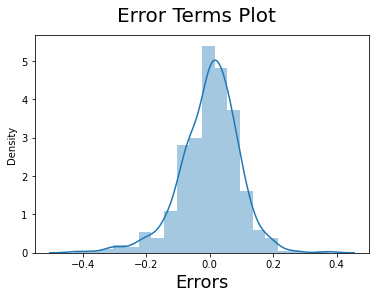

In [76]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms Plot', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

As from the above plot we can see error terms are normally distributed.

### Check Error Terms are Independent

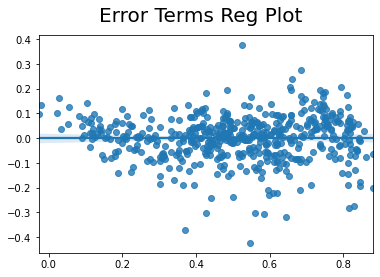

In [77]:
fig = plt.figure()
sns.regplot(x=y_train_cnt, y=y_train - y_train_cnt)
fig.suptitle('Error Terms Reg Plot', fontsize = 20)    
plt.show()

from above plot we can see there is not any pattern between errors and predicted value.

### check Homoscedasticity

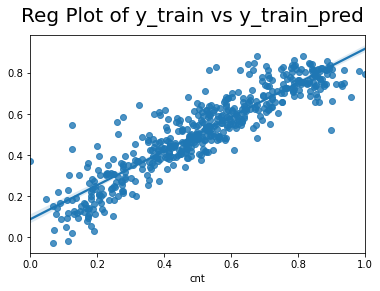

In [78]:
fig = plt.figure()
sns.regplot(x=y_train, y=y_train_cnt)
fig.suptitle('Reg Plot of y_train vs y_train_pred', fontsize = 20) 
plt.show()

From above plot we can see almost equal variance in residuals

### check multicollinearity among predictors

In [79]:
cal_vif(X_train_M6)

,Features,VIF
2,temp,4.81
3,windspeed,4.30
0,yr,2.05
4,season_spring,1.63
7,weathersit_Mist,1.52
5,season_winter,1.40
8,mnth_July,1.35
9,mnth_Sep,1.20
6,weathersit_LighRain,1.09
1,holiday,1.04


all the varibles VIF are in range so there is no multicollinearity amongst predictors.

## Step 9:Prediction on Test Data

#### Applying the scaling on the test sets

In [80]:
var_to_scale=['temp','hum','windspeed','cnt']

# apply scaler function to selected variables
df_test[var_to_scale] = scaler.transform(df_test[var_to_scale])

#### Dividing into X_test and y_test

In [81]:
y_test = df_test['cnt']
X_test = df_test.loc[ : , df_test.columns != 'cnt']


In [82]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_M6.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [83]:
# Making predictions
y_pred = lm_6.predict(X_test_new)

## Model Evaluation

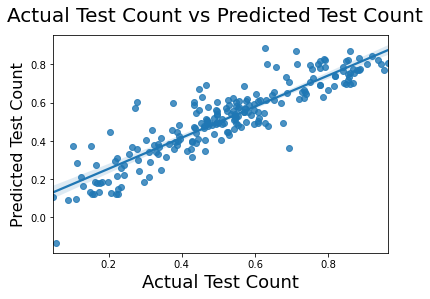

In [84]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.regplot(y_test,y_pred)
fig.suptitle('Actual Test Count vs Predicted Test Count', fontsize=20)              # Plot heading 
plt.xlabel('Actual Test Count', fontsize=18)                          # X-label
plt.ylabel('Predicted Test Count', fontsize=16)        
plt.show()

### R-square ,RMSE and Adjusted R-square

##### Test dataset

In [85]:
from sklearn.metrics import mean_squared_error
import math

from sklearn.metrics import r2_score
r2_test=r2_score(y_test, y_pred)
print('Test dataset R square:')
print (r2_test)
print('\n')
MSE = mean_squared_error(y_test, y_pred)

RMSE = math.sqrt(MSE)
print("Test dataset Root Mean Square Error:")
print(RMSE)
print('\n')
n = X_test_new.shape[0]
p = X_test_new.shape[1]

adjusted_r2 = 1-(1-r2_test)*(n-1)/(n-p-1)
print("Test dataset Adjusted R square:")
print(adjusted_r2)

Test dataset R square:
0.8093879912362577


Test dataset Root Mean Square Error:
0.09514868049207427


Test dataset Adjusted R square:
0.7992588506739333


##### Train Dataset

In [86]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
r_S=r2_score(y_train, y_train_cnt)
print("Train dataset R square:")
print(r_S)

print('\n')

MSE_t = mean_squared_error(y_train, y_train_cnt)

RMSE_t = math.sqrt(MSE_t)
print("Root Mean Square Error of Train set:")
print(RMSE_t)

print('\n')
n1 = X_train.shape[0]
p1 = X_train.shape[1]

adjusted_r2_train = 1-(1-r_S)*(n1-1)/(n1-p1-1)
print("Train dataset Adjusted R square:")
print(adjusted_r2_train)


Train dataset R square:
0.8289823862534181


Root Mean Square Error of Train set:
0.09278753467009934


Train dataset Adjusted R square:
0.8194025614169913


### Summary

As per our model top 3 features which explains the demand of shared bikes are :
- `Temp` : Temperature :  The coefficient 0.454222 indicate that with respect to unit increase in temp variable the bike rental increase by 0.454222
- `weathersit_LighRain` : Weather Situation Light rain : The coefficient -0.286688 indicate that with respect to unit increase in weathersit_LighRain variable the bike rental decreases by 0.286688
- `yr` : year :  The coefficient 0.233333 indicate that with respect to unit increase in yr variable the bike rental increase by 0.233333

Next best features are :
- `season_spring` : The coefficient -0.113055 indicate that with respect to unit increase in season_spring variable the bike rental decreases by 0.113055
- `holiday` : The coefficient -0.096996 indicate that with respect to unit increase in holiday variable the bike rental decreases by 0.096996
- `mnth_Sep` : The coefficient 0.059388 indicate that with respect to unit increase in mnth_Sep variable the bike rental increase by 0.059388
- `windspeed` : The coefficient -0.088096 indicate that with respect to unit increase in windspeed variable the bike rental decreases by 0.088096

###### End of Report